<a href="https://colab.research.google.com/github/GuilhermeFerracini/Machine_Learning/blob/main/Deep_Learning/Pytorch_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#Import Libs
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.datasets import make_moons
from torch import nn
from torch import optim
from torchsummary import summary

In [7]:
#GPU x CPU
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

cuda


In [3]:
#Tipos de Tensores

#Tensor pode mudar o tipo da estrutura passada por padrão é float32
list = [[1,2],[3,4],[5,6]]
tns = torch.Tensor(list)
print(tns.dtype)
print(tns)
print('')

#Float32
tns = torch.FloatTensor(list)
print(tns.dtype)
print(tns)
print('')

#Float64
tns = torch.DoubleTensor(list)
print(tns.dtype)
print(tns)
print('')

#Int
tns = torch.LongTensor(list)
print(tns.dtype)
print(tns)
print('')

#Preserva o tipo do arr numpy para tns
arr = np.random.rand(3,2)
arr = arr.astype(int)
tns = torch.tensor(arr)
print(tns.dtype)
print(type(tns))
print(tns)
print('')

#Converter tensor para arr numpy
tns = torch.Tensor(list)
arr = tns.data.numpy()
print(tns.dtype)
print(tns)
print(type(arr))
print(arr)

torch.float32
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

torch.float32
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

torch.float64
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], dtype=torch.float64)

torch.int64
tensor([[1, 2],
        [3, 4],
        [5, 6]])

torch.int64
<class 'torch.Tensor'>
tensor([[0, 0],
        [0, 0],
        [0, 0]])

torch.float32
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
<class 'numpy.ndarray'>
[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [4]:
#Manipulando tensores

arr = 10*np.random.rand(3,3)
arr = arr.astype(int)
tns = torch.LongTensor(arr)
print(tns)
print('')

#Mudando um elemento do tensor
tns[1,1] = 10
print(tns)
print('')

#Visualizando o conteudo
print(tns[1:2,1:2])
print(tns[2])
print(tns[:,2])
print('')

#Iniciando Tensores 0s e 1s
tns1= torch.ones(2,3)
tns0= torch.zeros(5,4)
tns_rand= torch.randn(4,4)
print(tns1)
print('')
print(tns0)
print('')
print(tns_rand)
print('')

#Dimensionamento de 4x3 para 2X2X3
arr = 10*np.random.rand(4,3)
tns = torch.LongTensor(arr)
print(tns.shape)
#print(tns.size())
print(tns.view(-1))
tns = tns.view(2,2,3)
print(tns)
#tns_out = torch.cat( (tns1, tns2), dim=0 ) concatenacao
#torch.squeeze() e torch.unsqueeze() Remover e add dimensoes

tensor([[1, 4, 9],
        [2, 1, 0],
        [8, 9, 6]])

tensor([[ 1,  4,  9],
        [ 2, 10,  0],
        [ 8,  9,  6]])

tensor([[10]])
tensor([8, 9, 6])
tensor([9, 0, 6])

tensor([[1., 1., 1.],
        [1., 1., 1.]])

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

tensor([[ 0.5329,  0.1147, -1.0605, -1.9893],
        [ 0.2534,  0.1057,  0.0905, -1.4134],
        [-0.8170, -0.8410, -1.2852, -0.7243],
        [-0.8498,  0.2927,  0.6019, -0.4404]])

torch.Size([4, 3])
tensor([2, 4, 7, 2, 4, 2, 8, 2, 4, 7, 6, 6])
tensor([[[2, 4, 7],
         [2, 4, 2]],

        [[8, 2, 4],
         [7, 6, 6]]])


In [6]:
#Perceptron
torch.manual_seed(42)
perceptron = nn.Linear(3, 1)
print(perceptron)
print(perceptron.weight.data)
print(perceptron.bias.data)
print('')

#Entrada e saida
w1, w2, w3 = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy()
X = torch.Tensor([42, 33, 99])
y = perceptron(X)
print(y)

Linear(in_features=3, out_features=1, bias=True)
tensor([[ 0.4414,  0.4792, -0.1353]])
tensor([0.5304])

tensor([21.4927], grad_fn=<ViewBackward0>)


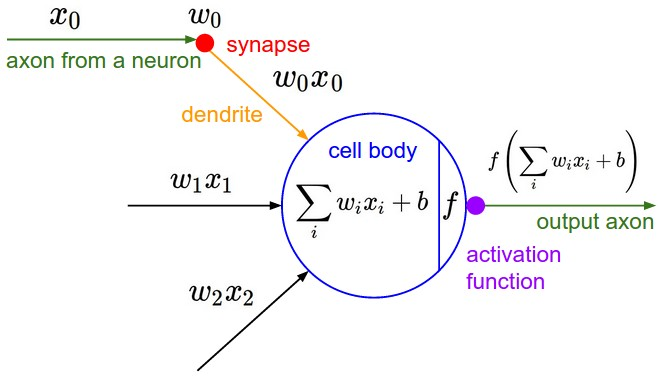


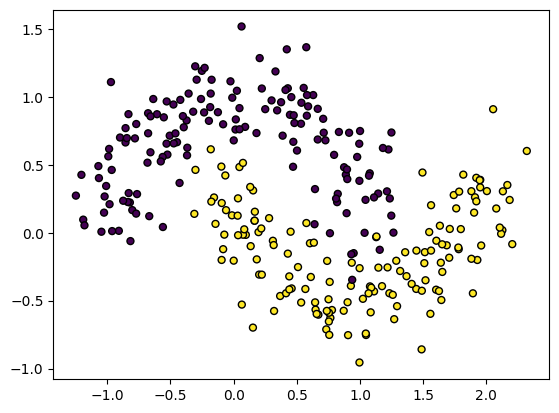

In [7]:
X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o',
 c=Y1, s=25, edgecolor='k')

In [11]:
input_size = 2
hidden_size = 8
output_size = 1

net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size), # hidden (escondida)
                    nn.ReLU(),   # ativação não linear
                    nn.Linear(in_features=hidden_size, out_features=output_size)) # output (saída)
net = net.to(device)
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


In [13]:
print(X1.shape)
tensor = torch.from_numpy(X1).float().to(device) #tensor recebe dados do numpy do tipo float32 padrao
pred   = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])


In [14]:
summary(net, input_size=(1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [15]:
class MinhaRede(nn.Module):

  def __init__(self, input_size, hidden_size, output_size):
    super(MinhaRede, self).__init__()

    # Definir a arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu   = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, X):

    # Gerar uma saída a partir do X
    hidden = self.relu(self.hidden(X))
    output = self.output(hidden)

    return output

In [16]:

input_size = 2
hidden_size = 8
output_size = 1

net = MinhaRede(input_size,hidden_size, output_size)  ## O método __init__()
net = net.to(device)
print(net)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [17]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
tensor = tensor.to(device)  #Conectar com GPU
pred   = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])


(178, 2) (178,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] ['class_0' 'class_1' 'class_2']


Text(0, 0.5, 'color_intensity')

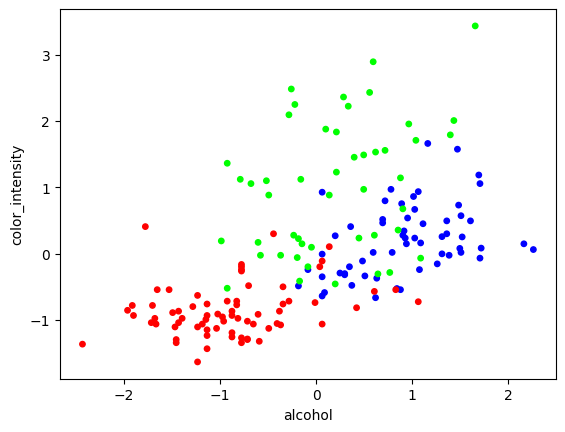

In [14]:
# Classificação x Regressão

#Wine classification

#Selecionando 2 features em especifico.
features = [0, 9]

wine = datasets.load_wine()
data = wine.data[:, features]
targets = wine.target

print(data.shape, targets.shape)
print(wine.feature_names, wine.target_names)


#Padronização da escala das features
scaler = StandardScaler()
data = scaler.fit_transform(data)

plt.scatter(data[:, 0], data[:,1], c=targets, s=15, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])


In [15]:
#MLP
class WineClassifier(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(WineClassifier, self).__init__()

    self.hidden  = nn.Linear(input_size, hidden_size)
    self.relu    = nn.ReLU()
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax()

  def forward(self, X):

    feature = self.relu(self.hidden(X))
    output  = self.softmax(self.out(feature))

    return output

input_size  = data.shape[1]
hidden_size = 32
out_size    = len(wine.target_names)

net = WineClassifier(input_size, hidden_size, out_size).to(device) #cast na GPU
print(net)

WineClassifier(
  (hidden): Linear(in_features=2, out_features=32, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=32, out_features=3, bias=True)
  (softmax): Softmax(dim=None)
)


In [16]:
#Formatting Input and output
Xtns = torch.from_numpy(data).float()
Ytns = torch.from_numpy(targets)

# Cast na GPU
Xtns = Xtns.to(device)
Ytns = Ytns.to(device)

print(Xtns.dtype, Ytns.dtype)


pred = net(Xtns)


print(pred.shape, Ytns.shape)
print(pred[0].data, Ytns[0].data)


torch.float32 torch.int64
torch.Size([178, 3]) torch.Size([178])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([0.3452, 0.2394, 0.4154], device='cuda:0') tensor(0, device='cuda:0')


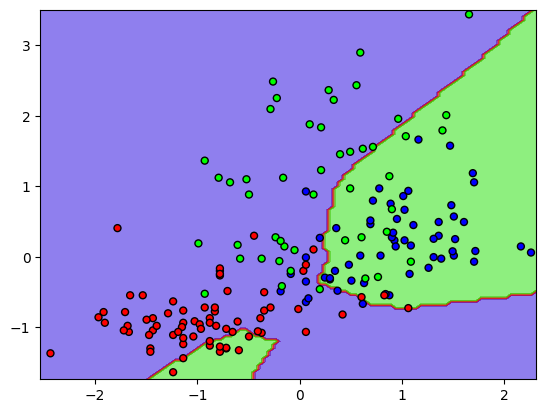

In [18]:
#Visualização das fronteiras Pre-Treino

def plot_boundary(X, y, model):
  x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
  y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

  spacing = min(x_max - x_min, y_max - y_min) / 100

  XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                       np.arange(y_min, y_max, spacing))

  data = np.hstack((XX.ravel().reshape(-1,1),
                    YY.ravel().reshape(-1,1)))

  # For binary problems
  # db_prob = model(Variable(torch.Tensor(data)).cuda() )
  # clf = np.where(db_prob.cpu().data < 0.5,0,1)

  # For multi-class problems
  db_prob = model(torch.Tensor(data).to(device) )
  clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)

  Z = clf.reshape(XX.shape)

  plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=25, cmap=plt.cm.brg)


plot_boundary(data, targets, net)

In [21]:
# Função de Perda
criterion = nn.CrossEntropyLoss().to(device)

# Otimizador: Descida do Gradiente
# Stochastic Gradient Descent
optimizer = optim.SGD(net.parameters(), lr=1e-3)

In [ ]:
#Fluxo de treinamento

for i in range(200):
  # Forward
  pred = net(Xtns)
  loss = criterion(pred, Ytns)

  # Backward
  loss.backward()
  optimizer.step()

  if i % 10 == 0:
    plt.figure()
    plot_boundary(data, targets, net)

CrossEntropyLoss()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
#Diabetes Regression
diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target

print(data.shape, target.shape)

print(data[14])
print(target[14])

(442, 10) (442,)
[ 4.53409833e-02 -4.46416365e-02 -2.56065715e-02 -1.25561242e-02
  1.76943802e-02 -6.12835791e-05  8.17748397e-02 -3.94933829e-02
 -3.19876395e-02 -7.56356220e-02]
118.0


In [23]:
#MLP
class WineClassifier(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(WineClassifier, self).__init__()

    self.hidden  = nn.Linear(input_size, hidden_size)
    self.relu    = nn.ReLU()
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax(dim = -1)

  def forward(self, X):

    feature = self.relu(self.hidden(X))
    output  = self.softmax(self.out(feature))

    return output

input_size  = data.shape[1]
hidden_size = 32
out_size    = 1  # Progressão da diabetes

net = WineClassifier(input_size, hidden_size, out_size).to(device) #cast na GPU

In [24]:
#Loss function: MSE
#Funções de perda correspondentes esperam que ambos o rótulo e a predição tenham a mesma dimensionalidade

# Cast na GPU
Xtns = torch.from_numpy(data).float().to(device)
Ytns = torch.from_numpy(target).float().to(device)
pred = net(Xtns)
print(Xtns.shape, Ytns.shape)


criterion = nn.MSELoss().to(device)
loss = criterion(pred.squeeze(), Ytns)
print(loss.data)

torch.Size([442, 10]) torch.Size([442])
tensor(28771.2168, device='cuda:0')


In [25]:
#L1

criterion = nn.L1Loss().to(device)
pred = net(Xtns)
loss = criterion(pred.squeeze(), Ytns)
print(loss.data)

tensor(151.1335, device='cuda:0')
